<a href="https://colab.research.google.com/github/csh9/Advhw/blob/master/HWass2addcodeblocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# Author: Olivier Grisel <olivier.grisel@ensta.org>
#         Lars Buitinck
#         Chyi-Kwei Yau <chyikwei.yau@gmail.com>
# License: BSD 3 clause

from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()


# Load the 20 newsgroups dataset and vectorize it. We use a few heuristics
# to filter out useless terms early on: the posts are stripped of headers,
# footers and quoted replies, and common English words, words occurring in
# only one document or in at least 95% of the documents are removed.

print("Loading dataset...")
t0 = time()
data, _ = fetch_20newsgroups(shuffle=True, random_state=1,
                             remove=('headers', 'footers', 'quotes'),
                             return_X_y=True)
data_samples = data[:n_samples]
print("done in %0.3fs." % (time() - t0))


# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   max_features=n_features,
                                   stop_words='english')
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()

# Fit the NMF model
print("Fitting the NMF model (Frobenius norm) with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (Frobenius norm):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

# Fit the NMF model
print("Fitting the NMF model (generalized Kullback-Leibler divergence) with "
      "tf-idf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model (generalized Kullback-Leibler divergence):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Loading dataset...
done in 1.550s.
Extracting tf-idf features for NMF...
done in 0.296s.
Extracting tf features for LDA...
done in 0.292s.

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.346s.

Topics in NMF model (Frobenius norm):
Topic #0: just people don think like know time good make way really say right ve want did ll new use years
Topic #1: windows use dos using window program os drivers application help software pc running ms screen files version card code work
Topic #2: god jesus bible faith christian christ christians does heaven sin believe lord life church mary atheism belief human love religion
Topic #3: thanks know does mail advance hi info interested email anybody looking card help like appreciated information send list video need
Topic #4: car cars tires miles 00 new engine insurance price condition oil power speed good 000 brake year models used bought
Topic #5: edu soon com send university internet mit ftp m

In [31]:
wordlist = data_samples[0].split()
BigString = ''.join(data_samples)
wordfreq =[]
for w in wordlist:
    wordfreq.append(wordlist.count(w))
str(list(zip(wordlist, wordfreq)))

'[(\'Well\', 1), ("i\'m", 1), (\'not\', 3), (\'sure\', 1), (\'about\', 1), (\'the\', 14), (\'story\', 1), (\'nad\', 1), (\'it\', 1), (\'did\', 1), (\'seem\', 2), (\'biased.\', 1), (\'What\', 2), (\'I\', 3), (\'disagree\', 1), (\'with\', 1), (\'is\', 8), (\'your\', 1), (\'statement\', 1), (\'that\', 4), (\'the\', 14), (\'U.S.\', 4), (\'Media\', 1), (\'is\', 8), (\'out\', 1), (\'to\', 4), (\'ruin\', 1), (\'Israels\', 2), (\'reputation.\', 1), (\'That\', 1), (\'is\', 8), (\'rediculous.\', 1), (\'The\', 3), (\'U.S.\', 4), (\'media\', 3), (\'is\', 8), (\'the\', 14), (\'most\', 1), (\'pro-israeli\', 1), (\'media\', 3), (\'in\', 4), (\'the\', 14), (\'world.\', 1), (\'Having\', 1), (\'lived\', 1), (\'in\', 4), (\'Europe\', 1), (\'I\', 3), (\'realize\', 1), (\'that\', 4), (\'incidences\', 1), (\'such\', 1), (\'as\', 2), (\'the\', 14), (\'one\', 1), (\'described\', 1), (\'in\', 4), (\'the\', 14), (\'letter\', 1), (\'have\', 1), (\'occured.\', 1), (\'The\', 3), (\'U.S.\', 4), (\'media\', 3), (\'a

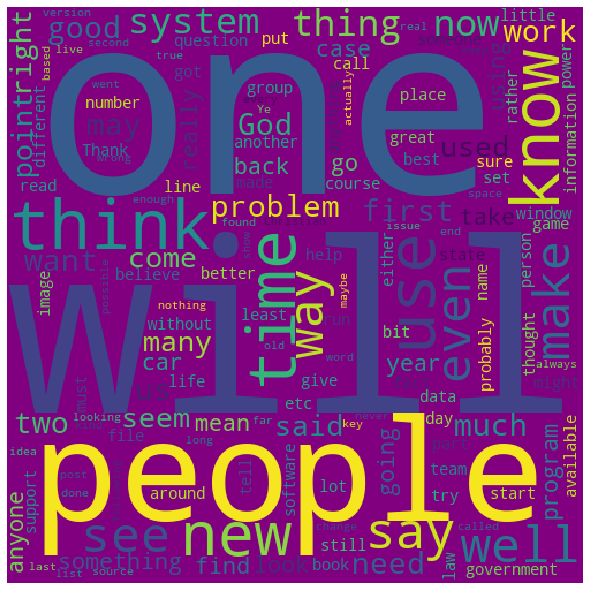

In [33]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

stopwords = set(STOPWORDS)
wordcloud = WordCloud (width = 500, height = 500,
background_color = 'purple',
stopwords = stopwords,
min_font_size = 10).generate(BigString)
# plot the WordCloud Image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad =0)
plt.show()